In this project, we analyze a data set consisting of housing prices in Boston and deal with linear regression in following steps

Step 1: Getting and setting up the data.

Step 2: Visualizing current data.

Step 3: Scikit learn to implement a multivariate regression.

Step 4: Training and Validation.  

Step 5: Predicting Prices

Step 6 :Residual Plots


#### Step 1: Getting & Seting Up The Data

In [48]:
# Standard imports
import numpy as np
import pandas as pd

#Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Setting styles and magic function to display graphs in notebook
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Import dataset from sklearn
from sklearn.datasets import load_boston

In [45]:
# Calling the load_boson function to get the data set
boston = load_boston()

boston
#Dictionary with 4 keys. DESCR, data, feature_names,target 
# target gives us prices of houses
# data gives Attribute data in order

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [49]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Step 2: Visualizing The Data

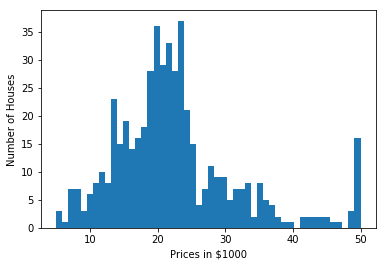

In [15]:
# Histogram of Prices
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000')
plt.ylabel('Number of Houses')
plt.show()

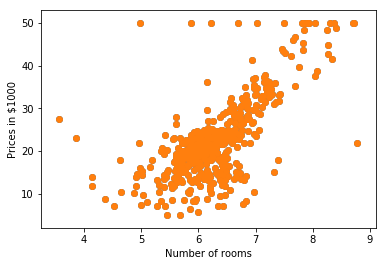

In [47]:
#Scatterplot to see how much one variable is affected by the other.
# We compare housing prices vs no of the rooms per dwelling.
# Rooms dwelling is 6 column in data

plt.scatter(boston['data'][:,5], boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('Prices in $1000')

plt.show()

Prices of houses increases with greater number of rooms.

In [53]:
# Creating a DataFrame from dataset
boston_df = pd.DataFrame(boston['data'])

# Adding column names to the DataFrame
boston_df.columns = boston['feature_names']

#Adding new column for prices
boston_df['Price'] = boston['target']

#Diplaying top 5 frame data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


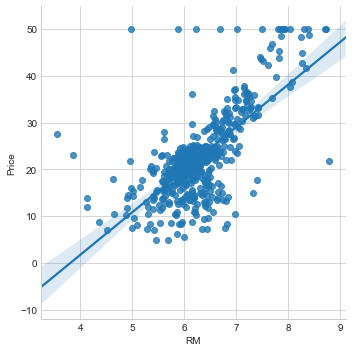

In [54]:
# Seaborns lmplot for linear regression
sns.lmplot('RM', 'Price', boston_df)

#### Part 3: Scikit learn to implement a multivariate regression

In [55]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [56]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [58]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


In [61]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [63]:
# Setting a DataFrame from the Features
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Setting a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


#### Part 4: Training & Validation

In [74]:
from sklearn.cross_validation import train_test_split
X = np.array( [ [value,1] for value in boston_df.RM ] )
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)

In [75]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [76]:

# Create regression object 
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [79]:
#Mean square error
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 41.04
Fit a model X_train, and calculate MSE with X_test and Y_test: 52.17


#### Part 5: Residual Plot

Text(0.5,1,'Residual Plots')

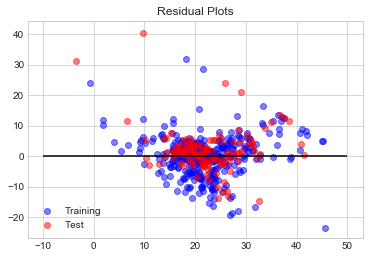

In [80]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

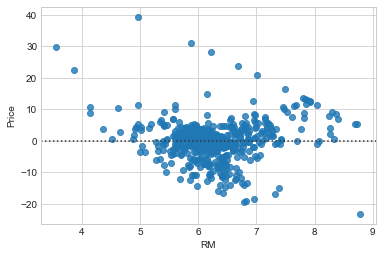

In [81]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)